Projeto 2
Jonatas Ribeiro
Dataset: pacients vs different types of drugs

MEI - Aprendizagem computacional

Introdução

Projeto 2 da disciplina de Machine learning, aplicando conceitos de classificação em um dataset multi-class, ou seja, com a escolha de mais de 3 classes.

Objetivo 

O objetivo principal, no contexto do dataset escolhido é fazer uma análise dos dados, dividir o dataset entre grupo de treino e grupo para teste (validação), e verificar a assertividade do modelo em predições com o grupo de testes, após a aplicação de diferentes técnicas ensinadas em aula durante o semestre.

Implementação e análise dos dados

Abaixo, deixei em um bloco todos os pacotes utilizados nesta análise.

In [1]:
#%% Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
## IMPORTING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#%% Reading dataset

data_set_drug = pd.read_csv("./drug200.csv")

#%% Reading the first 6 lines

data_set_drug.head()

#%% Checking for null/missing values

print(data_set_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


Variáveis categóricas

O que é:

Diferença entre orginal e não ordinal

In [3]:
#%% CATEGORICAL VARIABLES
data_set_drug.Drug.value_counts()
data_set_drug.Sex.value_counts()
data_set_drug.BP.value_counts()
data_set_drug.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Variáveis Numéricas

Média, min, max

Age skewness:  0.03030835703000607
Na to K skewness:  1.039341186028881


C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\3135621243.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set_drug['Age'])
C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\3135621243.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set_drug['Na_to_K'])


<Axes: xlabel='Na_to_K', ylabel='Density'>

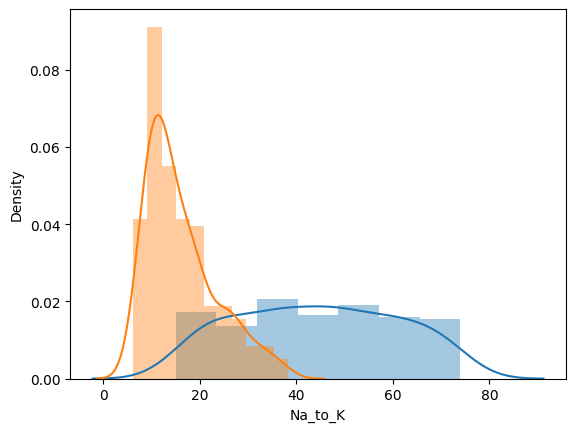

In [4]:
#%% NUMERICAL VARIABLES
# mean count, std, min, max and others using describe function
data_set_drug.describe()

skewAge = data_set_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

skewNatoK = data_set_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

sns.distplot(data_set_drug['Age'])
sns.distplot(data_set_drug['Na_to_K'])

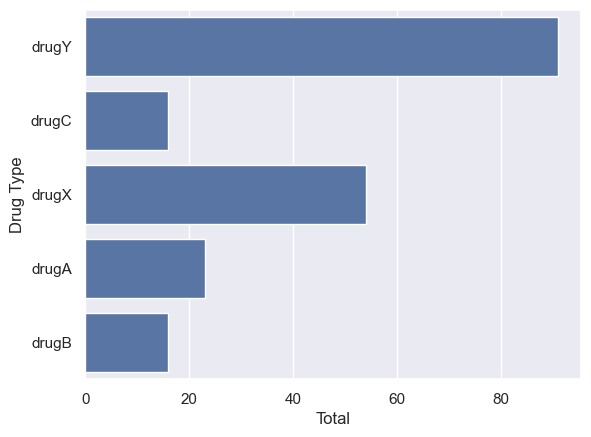

In [5]:
# %% DRUG TYPE DISTRIBUTION

sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=data_set_drug)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\2597103759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=data_set_drug, palette="rocket")


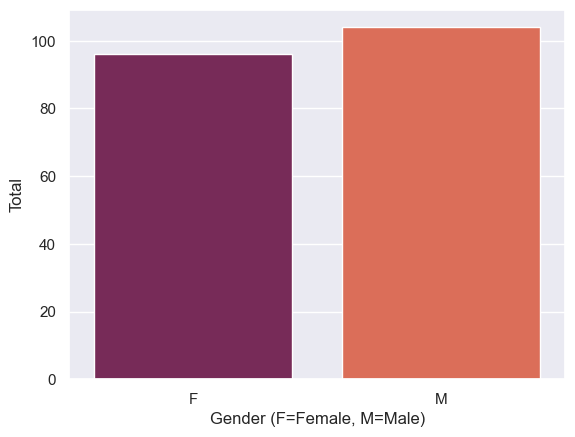

In [6]:
# %% GENDER DISTRIBUTION
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=data_set_drug, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\1897364166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="BP", data=data_set_drug, palette="crest")


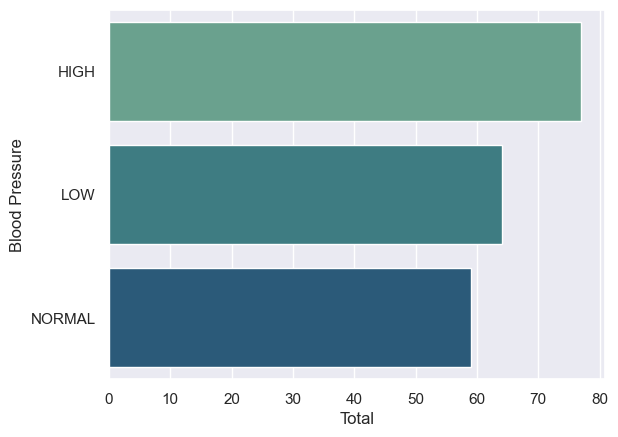

In [7]:
# %% BLOOD PRESSURE DISTRIBUTION
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=data_set_drug, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\962750900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cholesterol", data=data_set_drug, palette="magma")


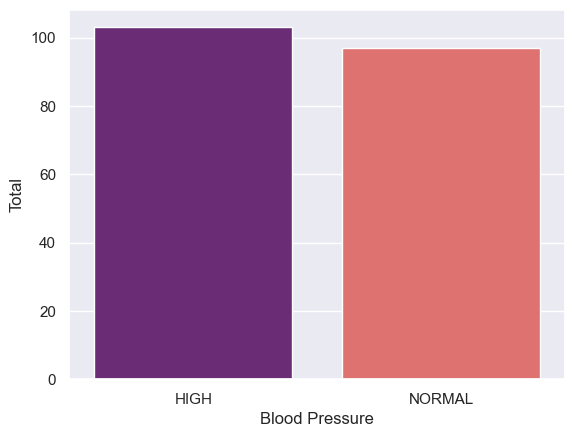

In [8]:
# %% Cholesterol DISTRIBUTION
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=data_set_drug, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

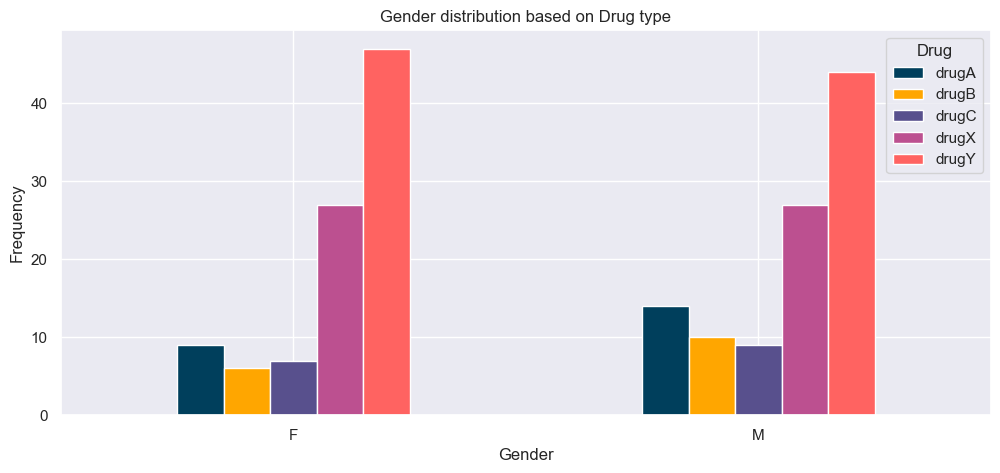

In [9]:
pd.crosstab(data_set_drug.Sex,data_set_drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

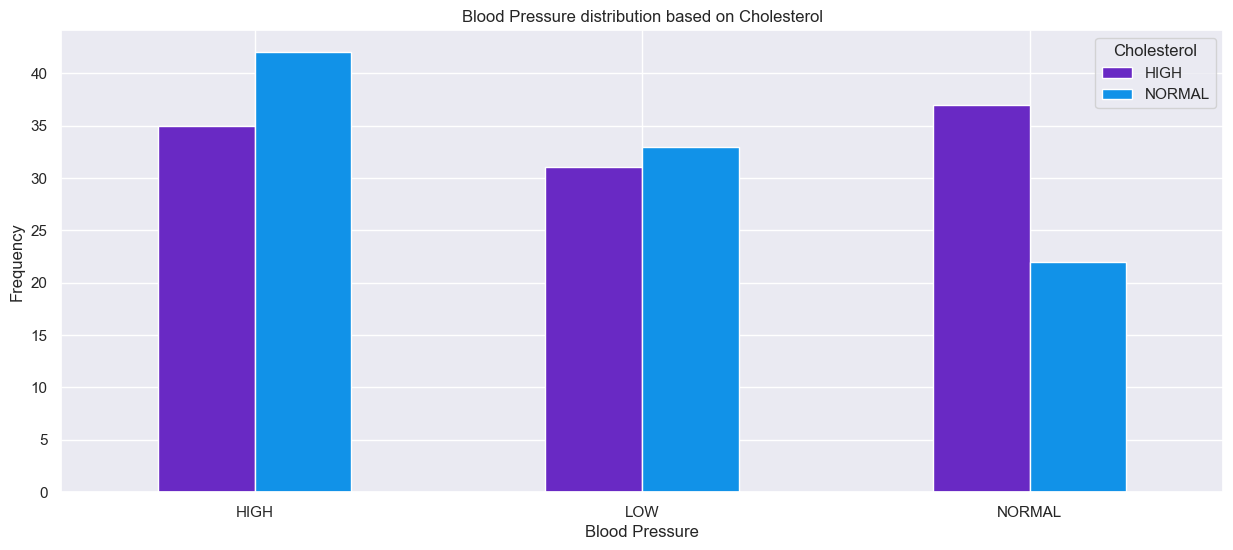

In [10]:
#%% Blood Pressure Distribution based on Cholesetrol
pd.crosstab(data_set_drug.BP,data_set_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

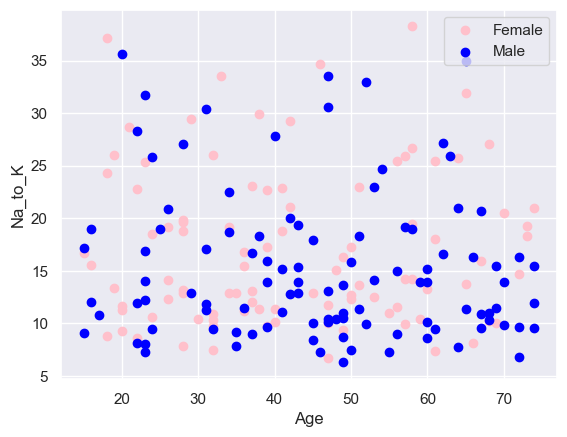

In [11]:
#%% Sodium to Potassium Distribution based on Gender and Age

plt.scatter(x=data_set_drug.Age[data_set_drug.Sex=='F'], y=data_set_drug.Na_to_K[(data_set_drug.Sex=='F')], c="Pink")
plt.scatter(x=data_set_drug.Age[data_set_drug.Sex=='M'], y=data_set_drug.Na_to_K[(data_set_drug.Sex=='M')], c="Blue")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

Preparação do DATASET



In [12]:
## AGE CATEGORY
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
data_set_drug['Age_binned'] = pd.cut(data_set_drug['Age'], bins=bin_age, labels=category_age)
data_set_drug = data_set_drug.drop(['Age'], axis = 1)

In [13]:
#%% Na_to_K
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
data_set_drug['Na_to_K_binned'] = pd.cut(data_set_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
data_set_drug = data_set_drug.drop(['Na_to_K'], axis = 1)

Divisão do dataset no segmento de treino e de testes, na proporção de 20% para testes e 80% para treino.

In [14]:
X = data_set_drug.drop(["Drug"], axis=1)
y = data_set_drug["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Engineering



C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\2933415904.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, data=data_set_drug, palette="mako_r")


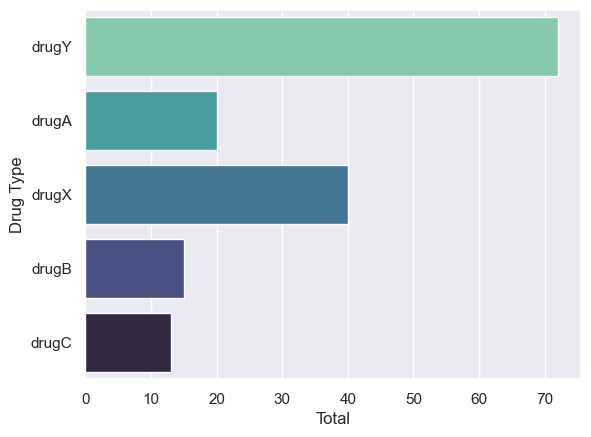

In [15]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train.head()

X_test.head()

sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=data_set_drug, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

Modelos utilizados para a análise do dataset

- Logistic Regression
- K Neighbours
- SVM
- Decision Tree
- Ramdom Forest

Pipeline e Grid-Search


In [16]:
# Define the models and their corresponding parameters
models = {
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', max_iter=5000),
        'params': {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__fit_intercept': [True, False],  
            'classifier__class_weight': [None, 'balanced'],
        }
    },
    'k_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 9],
            'classifier__weights': ['uniform', 'distance'],  # Additional parameter
            'classifier__p': [1, 2]  # Additional parameter
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto'],  # Additional parameter
            'classifier__degree': [2, 3, 4] 
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [3, 5, 7, 9],
            'classifier__min_samples_split': [2, 5, 10],  # Additional parameter
            'classifier__min_samples_leaf': [1, 2, 4],  # Additional parameter
            'classifier__criterion': ['gini', 'entropy']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10],  # Additional parameter
            'classifier__min_samples_leaf': [1, 2, 4],  # Additional parameter
            'classifier__criterion': ['gini', 'entropy'] 
        }
    }
}

# Create an empty dictionary to store the results for each model
results = {}

# Loop through the models and perform grid search for each model
for model_name, mp in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', mp['model'])
    ])
    grid_search = GridSearchCV(pipeline, mp['params'], cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    results[model_name] = {'model': grid_search, 'accuracy': accuracy}

# Print the results for each model
model_comparison = []
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(classification_report(y_test, result['model'].predict(X_test)))
    print(confusion_matrix(y_test, result['model'].predict(X_test)))
    print(f"{model_name} accuracy is: {result['accuracy']*100:.2f}%")
    print(f"Best hyperparameters for {model_name}: {result['model'].best_params_}")
    print("\n")
    model_comparison.append({'Model': model_name, 'Accuracy': result['accuracy']*100})

Model: logistic_regression
              precision    recall  f1-score   support

       drugA       0.60      1.00      0.75         3
       drugB       1.00      1.00      1.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.82      1.00      0.90        14
       drugY       1.00      0.63      0.77        19

    accuracy                           0.82        40
   macro avg       0.80      0.93      0.84        40
weighted avg       0.88      0.82      0.82        40

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 2  0  2  3 12]]
logistic_regression accuracy is: 82.50%
Best hyperparameters for logistic_regression: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__fit_intercept': True, 'classifier__penalty': 'l1'}


Model: k_neighbors
              precision    recall  f1-score   support

       drugA       0.50      0.67      0.57         3
       drugB       1.00      1.00      1.00         

Comparação entre modelos e resultados de assertividade

In [17]:
# Initialize an empty list to store the model names and accuracies
df_model_comparison = pd.DataFrame(model_comparison)

# Print the model comparison dataframe
print(df_model_comparison)

                 Model  Accuracy
0  logistic_regression      82.5
1          k_neighbors      72.5
2                  svm      75.0
3        decision_tree      72.5
4        random_forest      80.0
